<a href="https://colab.research.google.com/github/tiarayosianti/K-Means_K-Medoids_Clustering/blob/main/K_Means_and_K_Medoids_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats

# **Import Data**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data.csv")

In [ ]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
house = pd.DataFrame(data,columns=['street','price','sqft_lot','sqft_living','floors','bedrooms','city'])

In [ ]:
house

,street,price,sqft_lot,sqft_living,floors,bedrooms,city
0,18810 Densmore Ave N,3.130000e+05,7912,1340,1.5,3.0,Shoreline
1,709 W Blaine St,2.384000e+06,9050,3650,2.0,5.0,Seattle
2,26206-26214 143rd Ave SE,3.420000e+05,11947,1930,1.0,3.0,Kent
3,857 170th Pl NE,4.200000e+05,8030,2000,1.0,3.0,Bellevue
4,9105 170th Ave NE,5.500000e+05,10500,1940,1.0,4.0,Redmond
...,...,...,...,...,...,...,...
4595,501 N 143rd St,3.081667e+05,6360,1510,1.0,3.0,Seattle
4596,14855 SE 10th Pl,5.343333e+05,7573,1460,2.0,3.0,Bellevue
4597,759 Ilwaco Pl NE,4.169042e+05,7014,3010,2.0,3.0,Renton
4598,5148 S Creston St,2.034000e+05,6630,2090,1.0,4.0,Seattle


In [ ]:
house["city"].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

*Karena paling banyak Seattle jadinya pake yang Seattle*

In [ ]:
house_seattle=house[house['city']=='Seattle']

In [ ]:
house_seattle

,street,price,sqft_lot,sqft_living,floors,bedrooms,city
1,709 W Blaine St,2.384000e+06,9050,3650,2.0,5.0,Seattle
5,522 NE 88th St,4.900000e+05,6380,880,1.0,2.0,Seattle
9,6811 55th Ave NE,6.400000e+05,6200,1520,1.5,4.0,Seattle
11,3838-4098 44th Ave NE,1.400000e+06,4000,2920,1.5,4.0,Seattle
13,2504 SW Portland Ct,3.650000e+05,6435,1090,1.0,3.0,Seattle
...,...,...,...,...,...,...,...
4582,312 NE 81st St,4.060625e+05,4650,1290,1.0,2.0,Seattle
4585,4324 Dayton Ave N,4.868950e+05,3330,1890,1.5,3.0,Seattle
4591,3529 SW Webster St,3.961667e+05,5752,1880,1.0,3.0,Seattle
4595,501 N 143rd St,3.081667e+05,6360,1510,1.0,3.0,Seattle


*karna masih ada data duplikat pada street, maka perlu dibuat variabel baru agar variabel menjadi unique*

In [ ]:
house_seattle['street'].duplicated().sum()

30

In [ ]:
tes=np.fromfunction(lambda i, j: i+j+1, (1573,1))
str(tes)

'[[1.000e+00]\n [2.000e+00]\n [3.000e+00]\n ...\n [1.571e+03]\n [1.572e+03]\n [1.573e+03]]'

In [ ]:
house_seattle.insert(1, 'ID', tes)
house_seattle

,street,ID,price,sqft_lot,sqft_living,floors,bedrooms,city
1,709 W Blaine St,1.0,2.384000e+06,9050,3650,2.0,5.0,Seattle
5,522 NE 88th St,2.0,4.900000e+05,6380,880,1.0,2.0,Seattle
9,6811 55th Ave NE,3.0,6.400000e+05,6200,1520,1.5,4.0,Seattle
11,3838-4098 44th Ave NE,4.0,1.400000e+06,4000,2920,1.5,4.0,Seattle
13,2504 SW Portland Ct,5.0,3.650000e+05,6435,1090,1.0,3.0,Seattle
...,...,...,...,...,...,...,...,...
4582,312 NE 81st St,1569.0,4.060625e+05,4650,1290,1.0,2.0,Seattle
4585,4324 Dayton Ave N,1570.0,4.868950e+05,3330,1890,1.5,3.0,Seattle
4591,3529 SW Webster St,1571.0,3.961667e+05,5752,1880,1.0,3.0,Seattle
4595,501 N 143rd St,1572.0,3.081667e+05,6360,1510,1.0,3.0,Seattle


In [ ]:
house_seattle.loc[1:4598,'street+id'] = house_seattle['street'].str.cat(house_seattle['ID'].astype('str'),sep='; ID : ')

<ipython-input-16-6ef1fbcd9796>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_seattle.loc[1:4598,'street+id'] = house_seattle['street'].str.cat(house_seattle['ID'].astype('str'),sep='; ID : ')


In [ ]:
house_seattle

,street,ID,price,sqft_lot,sqft_living,floors,bedrooms,city,street+id
1,709 W Blaine St,1.0,2.384000e+06,9050,3650,2.0,5.0,Seattle,709 W Blaine St; ID : 1.0
5,522 NE 88th St,2.0,4.900000e+05,6380,880,1.0,2.0,Seattle,522 NE 88th St; ID : 2.0
9,6811 55th Ave NE,3.0,6.400000e+05,6200,1520,1.5,4.0,Seattle,6811 55th Ave NE; ID : 3.0
11,3838-4098 44th Ave NE,4.0,1.400000e+06,4000,2920,1.5,4.0,Seattle,3838-4098 44th Ave NE; ID : 4.0
13,2504 SW Portland Ct,5.0,3.650000e+05,6435,1090,1.0,3.0,Seattle,2504 SW Portland Ct; ID : 5.0
...,...,...,...,...,...,...,...,...,...
4582,312 NE 81st St,1569.0,4.060625e+05,4650,1290,1.0,2.0,Seattle,312 NE 81st St; ID : 1569.0
4585,4324 Dayton Ave N,1570.0,4.868950e+05,3330,1890,1.5,3.0,Seattle,4324 Dayton Ave N; ID : 1570.0
4591,3529 SW Webster St,1571.0,3.961667e+05,5752,1880,1.0,3.0,Seattle,3529 SW Webster St; ID : 1571.0
4595,501 N 143rd St,1572.0,3.081667e+05,6360,1510,1.0,3.0,Seattle,501 N 143rd St; ID : 1572.0


In [ ]:
house_seattle = house_seattle.drop(house_seattle.columns[[0,1,7]], axis=1)
house_seattle

,price,sqft_lot,sqft_living,floors,bedrooms,street+id
1,2.384000e+06,9050,3650,2.0,5.0,709 W Blaine St; ID : 1.0
5,4.900000e+05,6380,880,1.0,2.0,522 NE 88th St; ID : 2.0
9,6.400000e+05,6200,1520,1.5,4.0,6811 55th Ave NE; ID : 3.0
11,1.400000e+06,4000,2920,1.5,4.0,3838-4098 44th Ave NE; ID : 4.0
13,3.650000e+05,6435,1090,1.0,3.0,2504 SW Portland Ct; ID : 5.0
...,...,...,...,...,...,...
4582,4.060625e+05,4650,1290,1.0,2.0,312 NE 81st St; ID : 1569.0
4585,4.868950e+05,3330,1890,1.5,3.0,4324 Dayton Ave N; ID : 1570.0
4591,3.961667e+05,5752,1880,1.0,3.0,3529 SW Webster St; ID : 1571.0
4595,3.081667e+05,6360,1510,1.0,3.0,501 N 143rd St; ID : 1572.0


In [ ]:
house_seattle['street+id'].duplicated().sum()

0

In [ ]:
data_clustering = house_seattle.groupby('street+id').sum()
data_clustering

,price,sqft_lot,sqft_living,floors,bedrooms
street+id,,,,,
10 W Etruria St; ID : 1342.0,625000.0,1641,1820,3.0,3.0
100 20th Ave E; ID : 1308.0,600000.0,2002,910,1.5,2.0
100 24th Ave E; ID : 64.0,460000.0,929,1230,2.0,2.0
10000-10026 S 100th St; ID : 1443.0,284000.0,8800,1880,1.0,4.0
10005 16th Ave S; ID : 1086.0,265000.0,9450,1620,1.5,3.0
...,...,...,...,...,...
9853 Arrowsmith Ave S; ID : 1175.0,450000.0,5650,2310,1.0,4.0
9854 25th Ave SW; ID : 821.0,148000.0,8261,620,1.0,1.0
9957 Rainier Ave S; ID : 909.0,418000.0,6250,2360,1.0,4.0


# **Cek Asumsi**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### *Asumsi bebas pencilan, untuk metode Kmeans*

<Axes: >

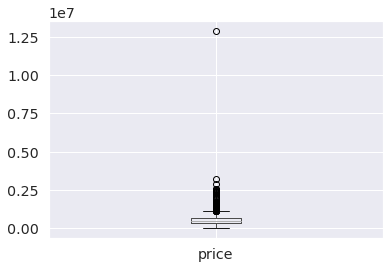

In [ ]:
sns.set(font_scale=1.3)
data_clustering.boxplot(column=['price'])

<Axes: >

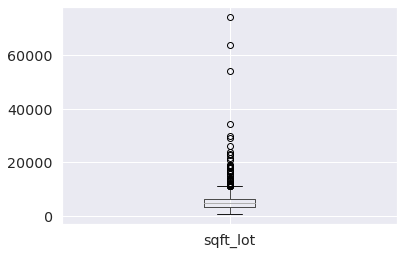

In [ ]:
data_clustering.boxplot(column=['sqft_lot'])

<Axes: >

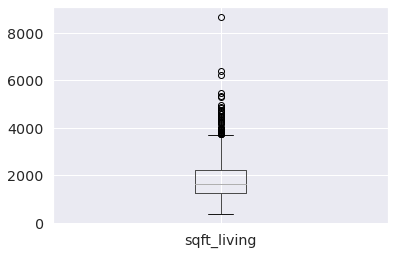

In [ ]:
data_clustering.boxplot(column=['sqft_living'])

<Axes: >

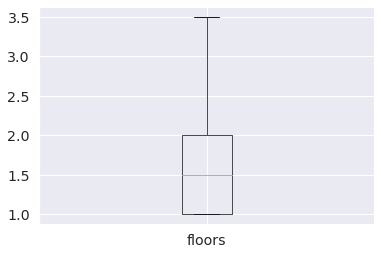

In [ ]:
data_clustering.boxplot(column=['floors'])

<Axes: >

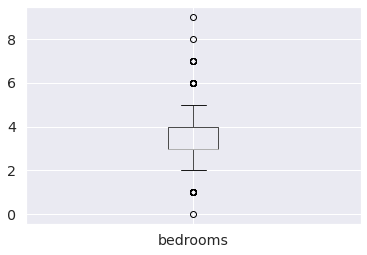

In [ ]:
data_clustering.boxplot(column=['bedrooms'])

Terlihat semua variabel kecuali floors terdapat data pencilan, maka perlu dilakukan standarisasi terhadap semua variabel agar tidak terdapat perbedaan satuan antar variabel.

In [ ]:
aaa=['price','sqft_lot','sqft_living','floors','bedrooms']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_clustering[aaa] = sc.fit_transform(data_clustering[aaa])
data_clustering

,price,sqft_lot,sqft_living,floors,bedrooms
street+id,,,,,
10 W Etruria St; ID : 1342.0,0.097629,-0.895304,-0.010459,2.427328,-0.168847
100 20th Ave E; ID : 1308.0,0.043586,-0.807611,-1.114130,-0.050941,-1.163586
100 24th Ave E; ID : 64.0,-0.259057,-1.068262,-0.726026,0.775148,-1.163586
10000-10026 S 100th St; ID : 1443.0,-0.639523,0.843744,0.062311,-0.877031,0.825893
10005 16th Ave S; ID : 1086.0,-0.680596,1.001641,-0.253024,-0.050941,-0.168847
...,...,...,...,...,...
9853 Arrowsmith Ave S; ID : 1175.0,-0.280674,0.078553,0.583825,-0.877031,0.825893
9854 25th Ave SW; ID : 821.0,-0.933519,0.712812,-1.465849,-0.877031,-2.158326
9957 Rainier Ave S; ID : 909.0,-0.349850,0.224304,0.644467,-0.877031,0.825893


<Axes: >

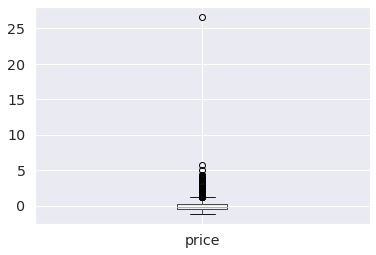

In [ ]:
data_clustering.boxplot(column=['price'])

<Axes: >

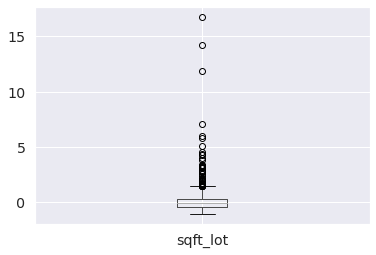

In [ ]:
data_clustering.boxplot(column=['sqft_lot'])

<Axes: >

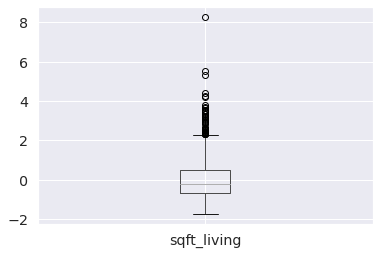

In [ ]:
data_clustering.boxplot(column=['sqft_living'])

<Axes: >

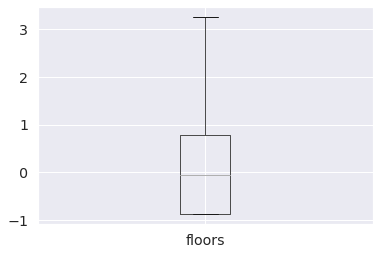

In [ ]:
data_clustering.boxplot(column=['floors'])

<Axes: >

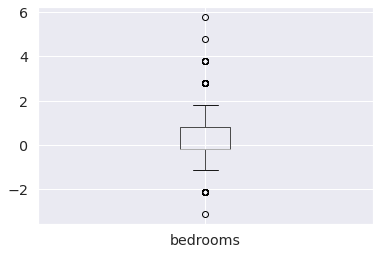

In [ ]:
data_clustering.boxplot(column=['bedrooms'])

Dapat dilihat standarisasi tidak terlalu berpengaruh terhadap data, namun data hasil standarisasi tetap lebih baik daripada data asli, sehingga akan digunakan data hasil standarisasi untuk analisis cluster.

### *Asumsi Kecukupan Sampel*

In [ ]:
import scipy.stats as stats

Bartlett Test

In [ ]:
stats.bartlett(house_seattle.price,house_seattle.sqft_lot,house_seattle.sqft_living,house_seattle.floors,house_seattle.bedrooms)

BartlettResult(statistic=105656.27851765027, pvalue=0.0)

**KMO** Test

In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 KB 31.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=9031b14bd800bce8e4ad183b5a7db1223560319d72327c472c231df2c6191a9a
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_clustering)
kmo_model

0.5678905713169808

### *Asumsi no multikolinearitas*

<Axes: >

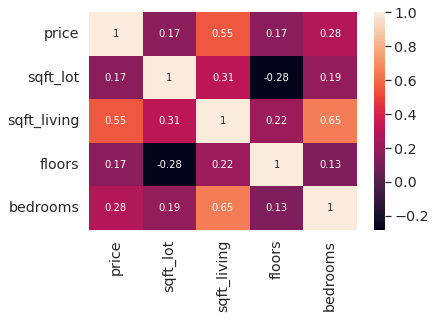

In [ ]:
%matplotlib inline
correlation = data_clustering.corr()
sns.heatmap(correlation,annot=True)

# **K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
bestsilhoutte = 0

In [ ]:
for num_clusters in range_n_clusters:

 # initialise KMeans
 kmeans = KMeans(init="random", n_clusters=num_clusters, n_init=10, max_iter=300,random_state=42)
 #fit the clusters
 kmeans.fit(data_clustering)
 clusters = kmeans.labels_
 print(num_clusters)

 # silhouette score
 score = silhouette_score(data_clustering, clusters, metric='euclidean')
 print('Silhouetter Score: %.5f' % score)
 silhouette_avg.append(score)

 if score > bestsilhoutte:
   bestclusters = clusters
   bestsilhoutte = score

2
Silhouetter Score: 0.32329
3
Silhouetter Score: 0.31223
4
Silhouetter Score: 0.32289
5
Silhouetter Score: 0.30499
6
Silhouetter Score: 0.26398
7
Silhouetter Score: 0.27010
8
Silhouetter Score: 0.27877


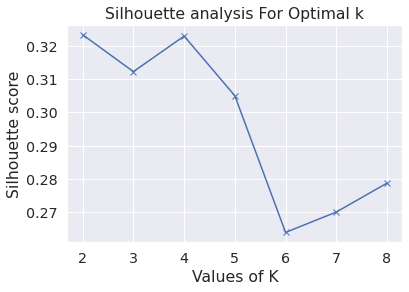

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
data_result_kmeans = data_clustering.copy()
bestclusters

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
data_result_kmeans['cluster'] = bestclusters

In [ ]:
data_result_kmeans

,price,sqft_lot,sqft_living,floors,bedrooms,cluster
street+id,,,,,,
10 W Etruria St; ID : 1342.0,0.097629,-0.895304,-0.010459,2.427328,-0.168847,1
100 20th Ave E; ID : 1308.0,0.043586,-0.807611,-1.114130,-0.050941,-1.163586,1
100 24th Ave E; ID : 64.0,-0.259057,-1.068262,-0.726026,0.775148,-1.163586,1
10000-10026 S 100th St; ID : 1443.0,-0.639523,0.843744,0.062311,-0.877031,0.825893,1
10005 16th Ave S; ID : 1086.0,-0.680596,1.001641,-0.253024,-0.050941,-0.168847,1
...,...,...,...,...,...,...
9853 Arrowsmith Ave S; ID : 1175.0,-0.280674,0.078553,0.583825,-0.877031,0.825893,0
9854 25th Ave SW; ID : 821.0,-0.933519,0.712812,-1.465849,-0.877031,-2.158326,1
9957 Rainier Ave S; ID : 909.0,-0.349850,0.224304,0.644467,-0.877031,0.825893,0


In [ ]:
data_result_kmeans['cluster'].value_counts()

1    1099
0     474
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Price each Cluster')

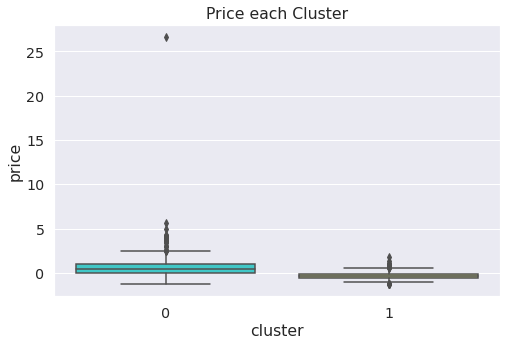

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='price',data=data_result_kmeans, palette='rainbow')
plt.title("Price each Cluster")

Text(0.5, 1.0, 'Square Feet Lot each Cluster')

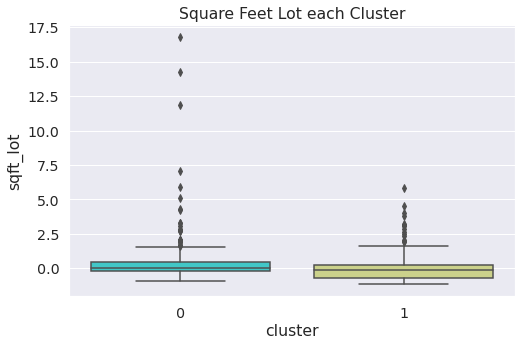

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='sqft_lot',data=data_result_kmeans, palette='rainbow')
plt.title("Square Feet Lot each Cluster")

Text(0.5, 1.0, 'Square Feet Living each Cluster')

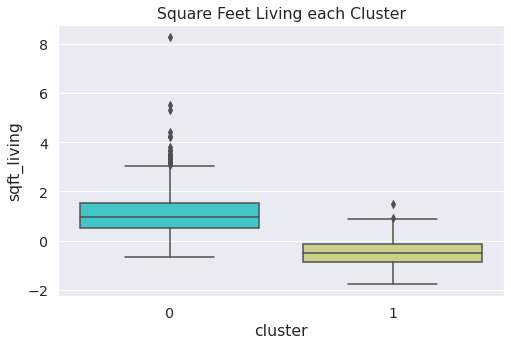

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='sqft_living',data=data_result_kmeans, palette='rainbow')
plt.title("Square Feet Living each Cluster")

Text(0.5, 1.0, 'Floors each Cluster')

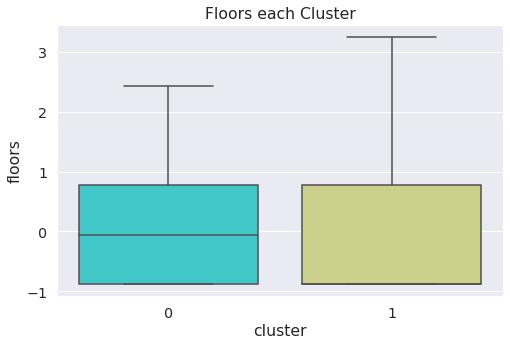

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='floors',data=data_result_kmeans, palette='rainbow')
plt.title("Floors each Cluster")

Text(0.5, 1.0, 'Bedrooms each Cluster')

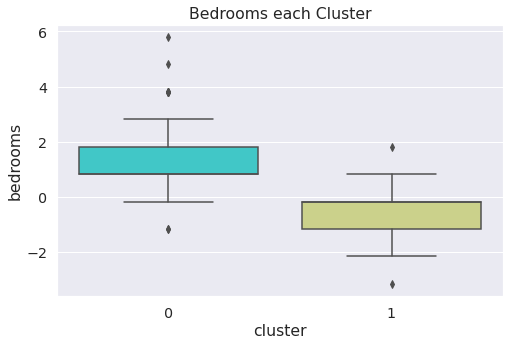

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='bedrooms',data=data_result_kmeans, palette='rainbow')
plt.title("Bedrooms each Cluster")

# **K-Medoids (PAM)**

In [ ]:
!pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
bestsilhoutte = 0

In [ ]:
for num_clusters in range_n_clusters:

 # initialise KMedoids
 kmedoids = KMedoids(n_clusters=num_clusters, random_state=0,method='pam')
 #fit the clusters
 kmedoids.fit(data_clustering)
 clusters = kmedoids.labels_
 print(num_clusters)

 # silhouette score
 score = silhouette_score(data_clustering, clusters, metric='euclidean')
 print('Silhouetter Score: %.3f' % score)
 silhouette_avg.append(score)

 if score > bestsilhoutte:
   bestclusters = clusters
   bestsilhoutte = score

2
Silhouetter Score: 0.300
3
Silhouetter Score: 0.290
4
Silhouetter Score: 0.192
5
Silhouetter Score: 0.240
6
Silhouetter Score: 0.247
7
Silhouetter Score: 0.255
8
Silhouetter Score: 0.248


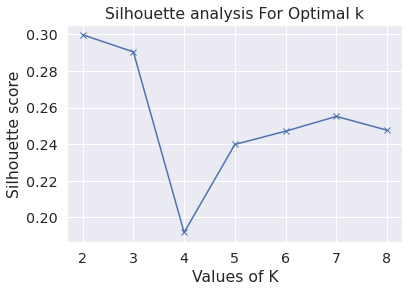

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
data_result_kmedoids = data_clustering.copy()

In [ ]:
data_result_kmedoids['cluster'] = bestclusters

In [ ]:
data_result_kmedoids

,price,sqft_lot,sqft_living,floors,bedrooms,cluster
street+id,,,,,,
10 W Etruria St; ID : 1342.0,0.097629,-0.895304,-0.010459,2.427328,-0.168847,1
100 20th Ave E; ID : 1308.0,0.043586,-0.807611,-1.114130,-0.050941,-1.163586,1
100 24th Ave E; ID : 64.0,-0.259057,-1.068262,-0.726026,0.775148,-1.163586,1
10000-10026 S 100th St; ID : 1443.0,-0.639523,0.843744,0.062311,-0.877031,0.825893,0
10005 16th Ave S; ID : 1086.0,-0.680596,1.001641,-0.253024,-0.050941,-0.168847,1
...,...,...,...,...,...,...
9853 Arrowsmith Ave S; ID : 1175.0,-0.280674,0.078553,0.583825,-0.877031,0.825893,0
9854 25th Ave SW; ID : 821.0,-0.933519,0.712812,-1.465849,-0.877031,-2.158326,1
9957 Rainier Ave S; ID : 909.0,-0.349850,0.224304,0.644467,-0.877031,0.825893,0


In [ ]:
data_result_kmedoids['cluster'].value_counts()

1    1017
0     556
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Price each Cluster')

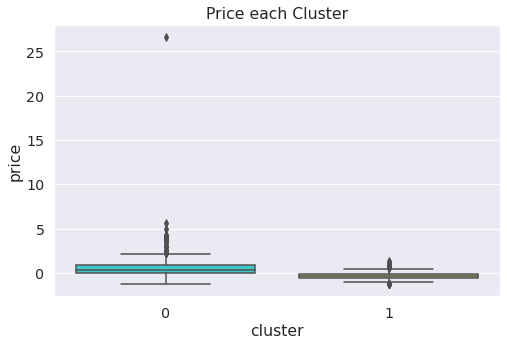

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='price',data=data_result_kmedoids, palette='rainbow')
plt.title("Price each Cluster")

Text(0.5, 1.0, 'Square Feet Lot each Cluster')

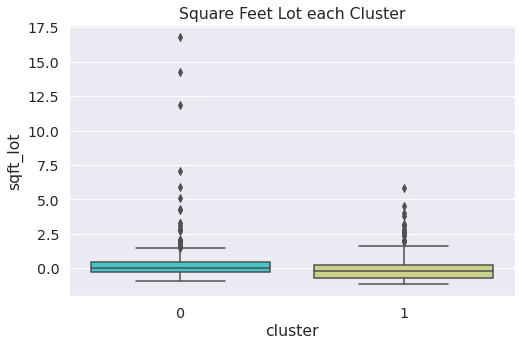

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='sqft_lot',data=data_result_kmedoids, palette='rainbow')
plt.title("Square Feet Lot each Cluster")

Text(0.5, 1.0, 'Square Feet Living each Cluster')

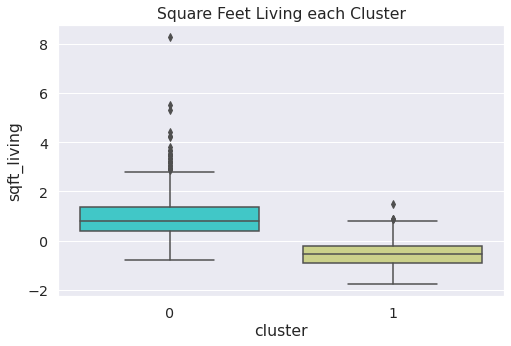

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='sqft_living',data=data_result_kmedoids, palette='rainbow')
plt.title("Square Feet Living each Cluster")

Text(0.5, 1.0, 'Floors each Cluster')

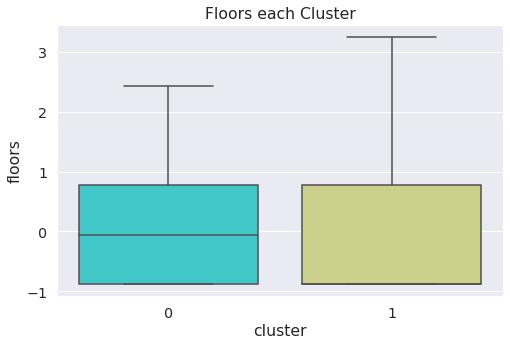

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='floors',data=data_result_kmedoids, palette='rainbow')
plt.title("Floors each Cluster")

Text(0.5, 1.0, 'Bedrooms each Cluster')

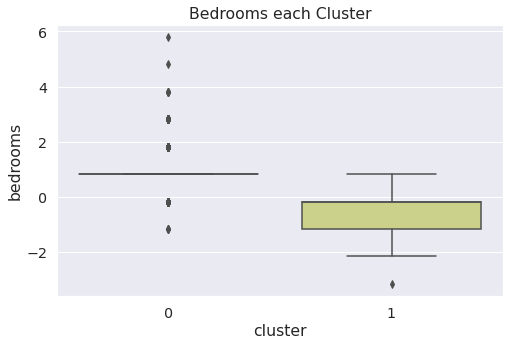

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster',y='bedrooms',data=data_result_kmedoids, palette='rainbow')
plt.title("Bedrooms each Cluster")